# Notes

## General Notes

1. While two time series might look similar, and have similar trends, they can still be "uncorrelated" in their changes. Thus, it is important to analyze both levels and percent changes of time series.
1. A simply strategy for "investment" is to see the "autocorrelation", which is the correlation given a n-days lag.
1. A time series is called __white noise__ if it has zero mean, zero variance and zero correlation at all lags. These series can't be predicted from previous values.
1. A __random walk__ series is one whose current value is the previous value plus __white noise__: $P_t = P_{t-1} + \epsilon_t$
1. A __random walk__ can have a __drift__ $\mu$ such that $P_t = \mu + P_{t-1} + \epsilon_t$, thus, the mena return is $\mu$ instead of 0.
1. To evaluate whether a time series is a __random walk__, then we can use linear regression on the previous value: $P_t = \alpha + \beta P_{t-1} + \epsilon_t$:
    1. If $\beta \sim 1$ then we cannot reject the null hypothesis (the series is a random walk with drift)
    1. If $\beta \sim 0$ we can reject the null hypothesis and try to predict the current value from the previous one.
1. A __Stationary Model__ is one such that the entire distribution of the data is time invariant. For example, the autocorrelation is only of function of the number of lags, but not of the time it's take.
1. An __AR(N)__ model is one such that $P_t = \mu + \sum_{i=1}^{N}\phi_i P_{t-i} + \epsilon_t$. For a stationary model, $-1 < \phi < 1$
1. In practice, we don't know the order of the __AR(N)__ series. To obtain the order, we can fit several __N__ and check the model with the lowest __Bayesian Information Criterion__.
1. An __MA(1)__ model is one such that $R_t = \mu + \epsilon_t + \theta\epsilon_{t-1}$, i.e., it's not the previous observation relevant to predict the current one, but the previous difference/error
1. __ARMA__ models are those who have __AR__ and __MA__ compenents, thus a generalization of both cases: $R_t = \mu + \phi R_{t-1} + \epsilon_t + \theta \epsilon_{t-1}$ is a __ARMA(1,1)__ model.
1. Two series, $P$ and $Q$, may follow a random walk and not be predictable, but their linear combination $P - c Q$ might be predictable. If that is the case, they are said to be __cointegratied__.

## Time Series Methods in Python

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Ohter tools/libraries used in this notebook

### Dickey-Fuller Test

Is a time series just a random walk? The __Dickey-Fuller Test__ checks this. If we use more than one lag, this is the __Augmented Dickey-Fuller Test__.

In [ ]:
# Create a random walk
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

In [3]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

test_stationarity(P)

ADF Test Statistic: -1.4596629510614103
p-value: 0.5533628502411881
# Lags Used: 0
# Observations: 499
The time series is not stationary


### Lowest BI

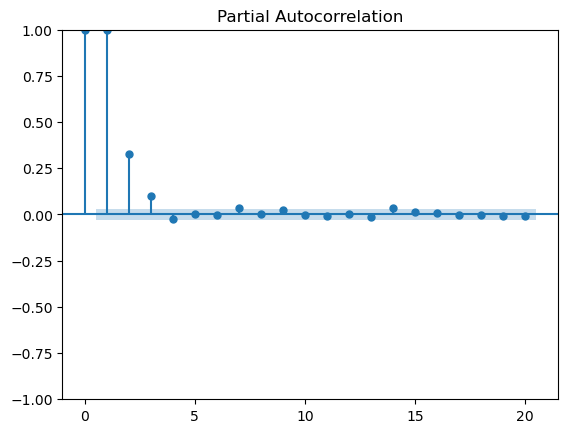

In [5]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6, -0.3, -0.1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data, lags=20)
plt.show()

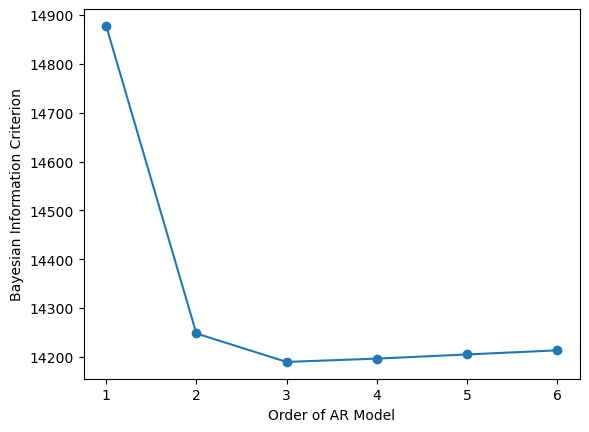

In [6]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()